In [1]:
""" Principal do projeto. Aqui onde é executado todas as funções e análises. """
# -*- coding: UTF-8 -*- 
import pandas as pd
import re

import settings
import analysis

df = pd.read_excel("csv/Histórico dos Chamados.xlsx")

# Mudar nome das categorias e serviços pra evitar bug de diretório
df["CATEGORIA"] = [re.sub("/", "|", cat) for cat in df["CATEGORIA"]]
df["SERVICO"] = [re.sub("/", "|", str(ser)) for ser in df["SERVICO"]]

In [2]:
# Limpar um pouco as descrições
redutor = lambda phrase: str.lower(str(phrase))
df["DESCRICAO"] = df["DESCRICAO"].apply(redutor)

cleaner = lambda phrase: analysis.cleanTextPart1(phrase)
df["DESCRICAO"] = df["DESCRICAO"].apply(cleaner)

/home/bots/.local/lib/python3.7/site-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "http://marmitariapaladar.com.br/home" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [3]:
qtd = 9
# Pegar as descrições dos top {qtd} serviços da top 1 categoria
categorias = df["CATEGORIA"].value_counts().index
dfCategoria = df[df["CATEGORIA"] == categorias[0]]
servicos = dfCategoria["SERVICO"].value_counts().index
allServiceDescriptions = [dfCategoria[dfCategoria["SERVICO"] == servicos[i]]["DESCRICAO"]
                          for i in range(qtd)]
names = [servicos[i][:14] for i in range(qtd)]

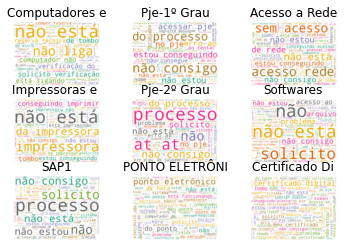

In [4]:
# Fazer nuvens das palavras mais utilizadas
analysis.makeWordCloud(allServiceDescriptions, settings.STOP_WORDS, names)

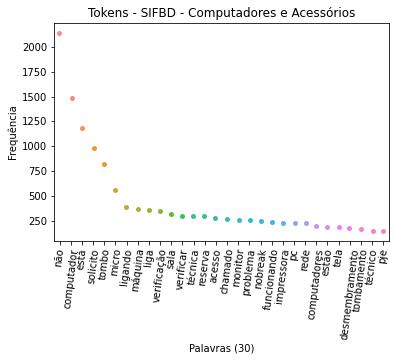

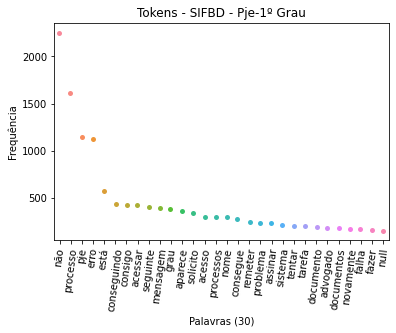

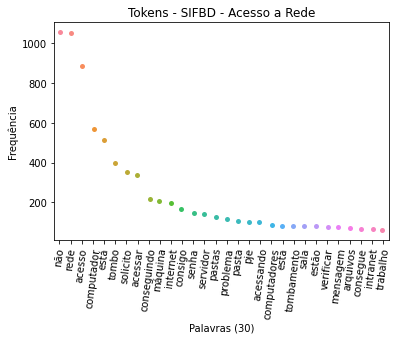

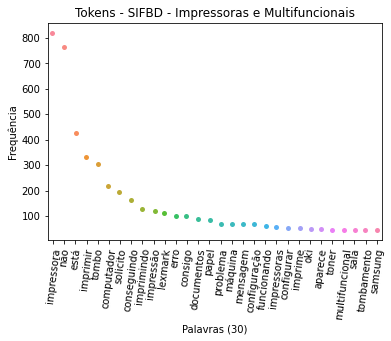

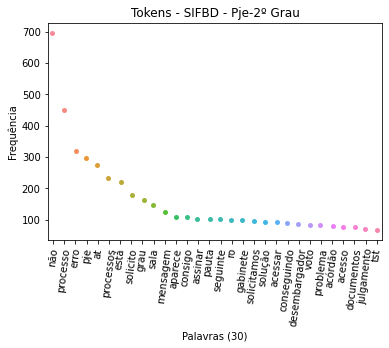

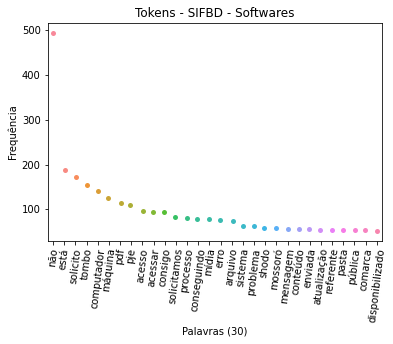

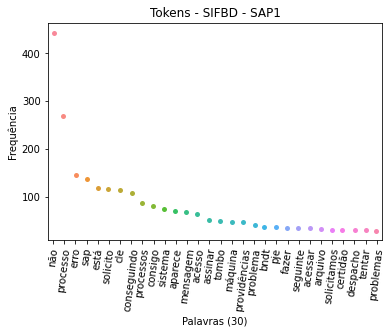

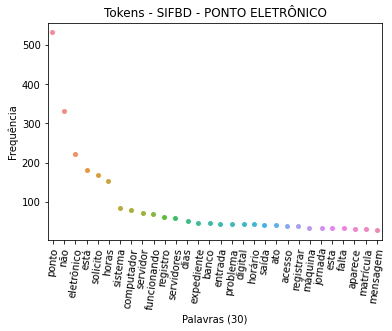

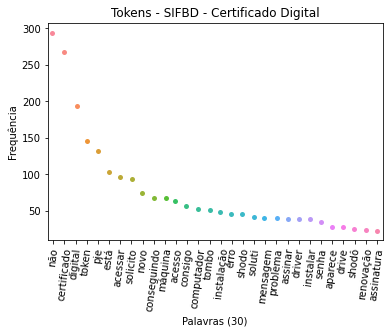

In [5]:
# Fazer um gráfico com as palavras comuns, pra ter ideia dos números
for index, servico in enumerate(servicos[:qtd]):
    #maiorQue = 0.08 * len(allServiceDescriptions[index])
    tokens = analysis.getFrequentTokens(allServiceDescriptions[index], settings.STOP_WORDS)
    nameTokens = [words[0] for words in tokens]
    countTokens = [words[1] for words in tokens]
    analysis.makeWordStrippBar("Tokens - SIFBD - %s" % servico,
                               nameTokens, countTokens)